<h1>0 - Features engineering</h1>

Import libraries

In [175]:
import pandas as pd
import os
import numpy as np

enableFeatureEngineering = True

<h3>Create new users dataframes with features engineering</h3>

In [176]:
# function
maxTransitions = 6
def returnFeaturesEnginnering(df):
    # First column always is an "one"
    df[0] = 0

    dataframelenght = len(df.index)
    dataList = []

    # For cada element of dataframe, count how many transitions between 1 and 0
    # exists
    for i in range(0, dataframelenght):
        # Must exist a transition in the last column to the script
        # count corretly the number of transitions
        line = df.iloc[i,:180]
        if line[179] == 0:        
            line[180] = 1
        else:
            line[180] = 0
        lineT = line.T.to_list()
        trans = np.bitwise_xor(lineT[0:-1],lineT[1:])
        trans.tolist()
        pos = np.where(trans == 1)
        temp = pos[0][1:] - pos[0][0:-1]
        # fill the line with zeros
        tamanho = temp.__len__()
        temp = np.resize(temp, maxTransitions)
        for k in range(tamanho, maxTransitions):
            temp[k] = 0

        dataList.append(temp.tolist())

    # Replace all the not a numbers to zeros
    frame = pd.DataFrame(dataList)
    frame = frame.replace (np.nan, 0)
    return frame

<h1>1. Prepare dataframes</h1>

Prepare Renan's dataframe

In [177]:
renan = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Renan"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)          
          
          # Execute only if available
          if enableFeatureEngineering:
               df = returnFeaturesEnginnering(df)
          
          df["Target letter"] = targetLetter
          df["Target person"] = "Renan"

          renan = pd.concat([renan,df])
          
renan = renan.reset_index(drop=True)
renan          

,0,1,2,3,4,5,Target letter,Target person
0,8,19,32,120,0,0,A,Renan
1,8,24,29,118,0,0,A,Renan
2,8,23,30,118,0,0,A,Renan
3,10,22,36,111,0,0,A,Renan
4,12,24,34,109,0,0,A,Renan
...,...,...,...,...,...,...,...,...
986,13,36,14,31,45,40,U,Renan
987,14,36,11,31,52,35,U,Renan
988,15,31,18,31,44,40,U,Renan
989,14,40,15,31,47,32,U,Renan


In [178]:
renan

,0,1,2,3,4,5,Target letter,Target person
0,8,19,32,120,0,0,A,Renan
1,8,24,29,118,0,0,A,Renan
2,8,23,30,118,0,0,A,Renan
3,10,22,36,111,0,0,A,Renan
4,12,24,34,109,0,0,A,Renan
...,...,...,...,...,...,...,...,...
986,13,36,14,31,45,40,U,Renan
987,14,36,11,31,52,35,U,Renan
988,15,31,18,31,44,40,U,Renan
989,14,40,15,31,47,32,U,Renan


Prepare Claudinei's dataframe

In [179]:
claudinei = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Claudinei"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)

          # Execute only if available
          if enableFeatureEngineering:
               df = returnFeaturesEnginnering(df)

          df["Target letter"] = targetLetter
          df["Target person"] = "Claudinei"

          claudinei = pd.concat([claudinei,df])
          
claudinei = claudinei.reset_index(drop=True)    


Prepare Guilherme's dataframe

In [180]:
guilherme = pd.DataFrame()

# for each file in directory, create a new dataframe
folder = "..\\letters\\Guilherme"
for directory, subfolder, files in os.walk(folder):     
     for file in files:
          targetLetter = file.replace(".csv","")
          # Create a dataframe without header and drop last column
          df = pd.DataFrame()
          df = pd.read_csv(os.path.join(os.path.realpath(directory), file), header=None, sep=";")
          df = df.drop(180, axis=1)

          # Execute only if available
          if enableFeatureEngineering:
               df = returnFeaturesEnginnering(df)

          df["Target letter"] = targetLetter
          df["Target person"] = "Guilherme"

          guilherme = pd.concat([guilherme,df])
          
guilherme = guilherme.reset_index(drop=True)    

Merge the group dataframe

In [181]:
groupDataframe = pd.concat([renan,claudinei,guilherme])
groupDataframe = groupDataframe.reset_index(drop=True)

# Execute only if available
if enableFeatureEngineering:
    groupDataframe.columns = ["First cicle in 1", "First cicle in 0", "Second cicle in 1", "Second cicle in 0", "Third cicle in 1", "Third cicle in 0", "Target Letter", "Target person"]

groupDataframe

,First cicle in 1,First cicle in 0,Second cicle in 1,Second cicle in 0,Third cicle in 1,Third cicle in 0,Target Letter,Target person
0,8,19,32,120,0,0,A,Renan
1,8,24,29,118,0,0,A,Renan
2,8,23,30,118,0,0,A,Renan
3,10,22,36,111,0,0,A,Renan
4,12,24,34,109,0,0,A,Renan
...,...,...,...,...,...,...,...,...
3322,11,8,11,14,17,118,O,Guilherme
3323,12,7,12,8,17,123,O,Guilherme
3324,11,10,11,8,12,127,O,Guilherme
3325,11,10,11,8,12,127,O,Guilherme


<h1>2. Training</h1>

Merge dataframes

In [182]:
import pandas as pd

<h3>2.1 Neural network</h3>

Import libraries

In [183]:
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


<h2>Preparation for training</h2>

In [184]:
# Execute only if available
if enableFeatureEngineering:
    X = groupDataframe.iloc[:,0:maxTransitions]
else:
    X = groupDataframe.iloc[:,0:180]
X

,First cicle in 1,First cicle in 0,Second cicle in 1,Second cicle in 0,Third cicle in 1,Third cicle in 0
0,8,19,32,120,0,0
1,8,24,29,118,0,0
2,8,23,30,118,0,0
3,10,22,36,111,0,0
4,12,24,34,109,0,0
...,...,...,...,...,...,...
3322,11,8,11,14,17,118
3323,12,7,12,8,17,123
3324,11,10,11,8,12,127
3325,11,10,11,8,12,127


Letter as target

In [185]:
# Execute only if available
if enableFeatureEngineering:
    Y1 = groupDataframe.iloc[:,maxTransitions]
else:
    Y1 = groupDataframe.iloc[:,180]
Y1

0       A
1       A
2       A
3       A
4       A
       ..
3322    O
3323    O
3324    O
3325    O
3326    O
Name: Target Letter, Length: 3327, dtype: object

Person as target

In [186]:
# Execute only if available
if enableFeatureEngineering:    
    Y2 = groupDataframe.iloc[:,maxTransitions+1]
else:
    Y2 = groupDataframe.iloc[:,181]
Y2

0           Renan
1           Renan
2           Renan
3           Renan
4           Renan
          ...    
3322    Guilherme
3323    Guilherme
3324    Guilherme
3325    Guilherme
3326    Guilherme
Name: Target person, Length: 3327, dtype: object

Create data for training and for testing

In [187]:
seed = random.randrange(1268) 

X1_train, X1_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.3, random_state=4845)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.3, random_state=478)

<h3>Training</h3>

In [188]:
seed = random.randrange(1268) 
clf1 = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(3,6), random_state=1, max_iter=20000, activation='logistic') #2 camadas ocultas com 2 neurônios
clf1.fit(X1_train, np.ravel(y1_train))

MLPClassifier(activation='logistic', hidden_layer_sizes=(3, 6), max_iter=20000,
              random_state=1)

In [189]:
seed = random.randrange(1268) 
clf2 = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(150,120), random_state=seed, max_iter=5000, activation='relu') #2 camadas ocultas com 2 neurônios
clf2.fit(X2_train, np.ravel(y2_train))

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(150, 120), max_iter=5000,
              random_state=337, solver='sgd')

Testing

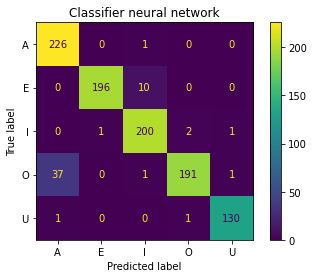

In [190]:
y1_pred = clf1.predict(X1_test)
ConfusionMatrixDisplay.from_predictions(y1_test, y1_pred)
plt.title('Classifier neural network')
plt.show()

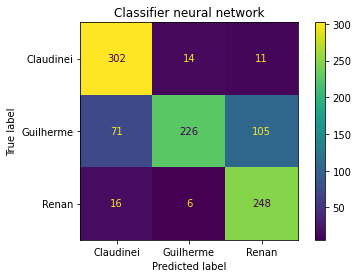

In [191]:
y2_pred = clf2.predict(X2_test)
ConfusionMatrixDisplay.from_predictions(y2_test, y2_pred)
plt.title('Classifier neural network')
plt.show()

In [192]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           A       0.86      1.00      0.92       227
           E       0.99      0.95      0.97       206
           I       0.94      0.98      0.96       204
           O       0.98      0.83      0.90       230
           U       0.98      0.98      0.98       132

    accuracy                           0.94       999
   macro avg       0.95      0.95      0.95       999
weighted avg       0.95      0.94      0.94       999



In [193]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

   Claudinei       0.78      0.92      0.84       327
   Guilherme       0.92      0.56      0.70       402
       Renan       0.68      0.92      0.78       270

    accuracy                           0.78       999
   macro avg       0.79      0.80      0.77       999
weighted avg       0.81      0.78      0.77       999

